# Active Learning : Training the Network

In this notebook, we will create, and train and save a small CNN model using CIFAR10 dataset.

In [15]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np


## Loading and visualizing the dataset 

- We will use:
    - cifar10 dataset for training
    - unlabelled images of cats and dogs to make predictions and identify the images with least confidence of the most dominant class
    

### Image transformations
- Both train and test set will be normalized to contain values between -1 and 1. For this, we will apply `Normalize` transformation with `mean = [0.5, 0.5, 0.5]` and `standard deviation = [0.5, 0.5, 0.5]`
- The unlabelled images will be resized to 32 x 32 because the training images i.e cifar10 have the size 32 x 32.
- Since the image size is small we will use a batch size of 128 for faster training in the GPU.

**Note: We won't be using the unlabelled dataset in this notebook. However, we will visualize it to have a sneek peek.**

In [16]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

test_transform = transforms.Compose(
    [
     transforms.Resize(32), # The dataset loaded from the disk isn't 32 X 32 so we need to introduce
#         transformations to make them 32 X 32
     transforms.CenterCrop(32),
     transforms.ToTensor(),
#      transforms.Normalize((0.0, 0.0, 0.0), (255.0, 255.0, 255.0)),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

batch_size = 128

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=4)

# Loading the test data from the folder in the local directory
testset = ImageFolder(root='./test/', transform=test_transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=4)

Files already downloaded and verified


In [17]:
# for visualization

def imshow(inp, mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array(mean)
    std = np.array(std)
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)

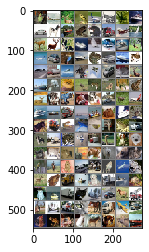

In [18]:
# Get a batch of training data and plot

inputs, classes = next(iter(trainloader))
out = torchvision.utils.make_grid(inputs)
imshow(out)

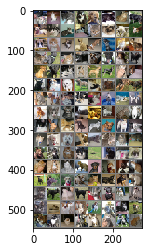

In [19]:
# Visualizing the test set
inputs, classes = next(iter(testloader))
out = torchvision.utils.make_grid(inputs)
imshow(out)

## Building the Neural Network

We will build a simple custom CNN with:
- 2 convolutional layers. Each convolutional layer is follwed by a relu and max pooling layer.
- The convolutional layers are followed by 3 fully connected layers. 

We will be using the CIFAR-10 dataset to train the model. The final layer will have 10 neurons as we have only 10 classes. 

In [ ]:
NUM_CLASSES = 10
EPOCHS = 10
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
class CNN(nn.Module):
    def __init__(self, n_classes=10):
        super().__init__()
        self.conv = nn.Conv2d(in_channels=3, 
                              out_channels=20, 
                              kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(20, 10, 3)
#         self.fc1 = nn.Linear(10 * 3 * 3, 80)
        self.fc1 = nn.Linear(360, 80)
        self.fc2 = nn.Linear(80, 40)
        self.fc3 = nn.Linear(40, n_classes)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x) # Should have applied softmax to this layer
        return x

In [ ]:
model = CNN(NUM_CLASSES).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)

## Training the neural network

In [35]:
def train(model, dataloader, optimizer, criterion, device):
    epoch_loss = 0
    for i, data in enumerate(dataloader):
        batch = 0
        batch_loss = 0.0
        
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        batch_loss += loss.item()
        epoch_loss += loss.item()
        if i % 50 == 0:
            print('step = {}, loss ={:.3f}'.format(i, batch_loss/50))
    print('epoch loss = {:.3f}'.format(epoch_loss))           

In [38]:
for epoch in range(EPOCHS):
    train(model=model, 
          dataloader=trainloader, 
          optimizer=optimizer, 
          criterion=criterion, 
          device=DEVICE)

step = 0, loss =0.046
step = 50, loss =0.046
step = 100, loss =0.046
step = 150, loss =0.046
step = 200, loss =0.046
step = 250, loss =0.046
step = 300, loss =0.046
step = 350, loss =0.046
epoch loss = 898.821
step = 0, loss =0.046
step = 50, loss =0.046
step = 100, loss =0.046
step = 150, loss =0.046
step = 200, loss =0.046
step = 250, loss =0.046
step = 300, loss =0.046
step = 350, loss =0.046
epoch loss = 898.529
step = 0, loss =0.046
step = 50, loss =0.046
step = 100, loss =0.046
step = 150, loss =0.046
step = 200, loss =0.046
step = 250, loss =0.046
step = 300, loss =0.046
step = 350, loss =0.046
epoch loss = 898.216
step = 0, loss =0.046
step = 50, loss =0.046
step = 100, loss =0.046
step = 150, loss =0.046
step = 200, loss =0.046
step = 250, loss =0.046
step = 300, loss =0.046
step = 350, loss =0.046
epoch loss = 897.862
step = 0, loss =0.046
step = 50, loss =0.046
step = 100, loss =0.046
step = 150, loss =0.046
step = 200, loss =0.046
step = 250, loss =0.046
step = 300, loss =0

## Save model

In [39]:
PATH = './saved_model/active.pth'
torch.save(model.state_dict(), PATH)